#WELLCOME Dataset
##1) Determine the five most common journals and the total articles for each. 
##2) Calculate the mean, median, and standard deviation of the open-access cost per article for each journal

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df =pd.read_csv('WELLCOME_APCspend2013_forThinkful (1).csv' , encoding= 'unicode_escape')
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
# work w/column to strip foreign character
cost_string = "COST (£) charged to Wellcome (inc VAT when charged)"
temporarycost =  cost_string.replace('£', '')
print(temporarycost)

COST () charged to Wellcome (inc VAT when charged)


In [4]:
len(df)

2127

In [5]:
len(df['Journal title'].unique())

985

In [7]:
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')

In [ ]:
len(df['Article title'].unique())

In [ ]:
journals= df['Journal title'] 
journals.value_counts()

##Five Most Common Journals and number of articles each:
PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19

In [9]:
# work w/column to strip foreign character
cost_string = "COST (£) charged to Wellcome (inc VAT when charged)"
temporarycost =  cost_string.replace('£', '')
print(temporarycost)

COST () charged to Wellcome (inc VAT when charged)


In [10]:
df['temporarycost'] = temporarycost

In [11]:
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)', 'temporarycost'],
      dtype='object')

In [19]:
#Convert data type of temporarycost to numeric 
df['temporarycost'] = pd.to_numeric(df['temporarycost'], errors='coerce') 

In [20]:
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)', 'temporarycost'],
      dtype='object')

In [21]:
df.head

<bound method NDFrame.head of                             PMID/PMCID                      Publisher  \
0                                  NaN                            CUP   
1                           PMC3679557                            ACS   
2                23043264  PMC3506128                             ACS   
3                  23438330 PMC3646402                            ACS   
4                 23438216 PMC3601604                             ACS   
...                                ...                            ...   
2122                           2901593          Wolters Kluwer Health   
2123                           3748854         Wolters Kluwer Health    
2124                           3785148         Wolters Kluwer Health    
2125          PMCID:\n    PMC3647051\n  Wolters Kluwer N.V./Lippinott   
2126  PMID: 23846567  (Epub July 2013)                Wolters Kluwers   

                                        Journal title  \
0                              Psych

In [22]:
df['temporarycost'].dtype

dtype('float64')

##2) Calculate the mean, median, and standard deviation of the open-access cost per article for each journal

In [16]:
#Example of MEAN:   df.groupby(['ms', 'mass amu'])['SEM c/s'].mean()
df.groupby(['Journal title'])['temporarycost'].mean()

Journal title
ACS Chemical Biology           NaN
ACS Chemical Neuroscience      NaN
ACS NANO                       NaN
ACS Nano                       NaN
ACTA F                         NaN
                                ..
Vision Research                NaN
Visual Neuroscience            NaN
Zoonoses and Public Health     NaN
genesis: Journal of Genetics   NaN
mBio                           NaN
Name: temporarycost, Length: 984, dtype: float64

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')

In [17]:
sum(df['temporarycost'].isnull())

2127

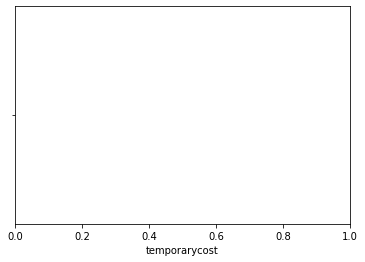

In [18]:
#Draw Boxplot after import seaborn as sns
#sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
#ax = sns.boxplot(x=tips["total_bill"])

#sns.set(style="whitegrid")
#temporarycost = sns.load_dataset("df")
#ax = sns.boxplot(x=temporarycost["temporarycost"])

sns.boxplot(x='temporarycost',data=df,palette='rainbow')

#Doesn't look like anything is out of range. Do I need to find SDs?